In [19]:
#importing the necessary libraries

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn import datasets

In [20]:
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3', 'pc4', 'pc5', 'pc6'])

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [25]:
#training the model

model=GaussianNB()
model.fit(X_train,Y_train)
print(model)

GaussianNB()


In [27]:
# running the model on the test set

expected = Y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

[[36  7]
 [ 2 69]]


Text(0.5, 257.44, 'Predicted label')

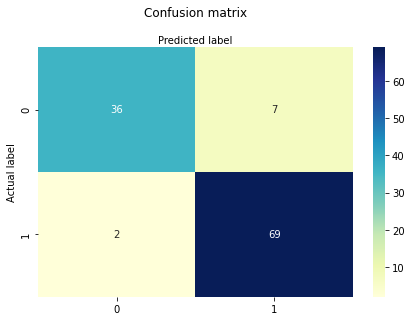

In [31]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
cnf_matrix = confusion_matrix(expected,predicted) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 